In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
# 우리나라 기후

In [42]:
df = pd.read_csv('./국내기후(백령도제외).csv', index_col=0)

df['시간'] = pd.to_datetime(df['시간'], format='%Y-%m-%d')

# df[df['시간'].dt.year > 1995]
df_k = df[df['시간'].dt.year > 1995]
df_k = df_k.reset_index()
df_k.drop('index', axis=1, inplace=True)

df_seoul = df_k[df_k['관측지점'] == '서울']

df_seoul.drop(['평균 기온','최저 기온','최고 기온','최고 해면 기압','최저 해면기압','합계 일조 시간'
               ,'1시간 최다 일사량','합계 일사','일 최심신적설','합계 3시간 신적설','평균 지면온도','평균 중하층운량'], axis=1, inplace=True)

df_seoul.rename(columns={'시간':'일시', '관측지점':'도시명'}, inplace=True)
df_seoul

col_li = df_seoul.columns

seo_li=['일시']
for i in col_li[1:]:
    na = '서울 '+i
    seo_li.append(na)
    


df_seoul.columns = seo_li

df_seoul.drop('서울 도시명', axis=1, inplace=True)
df_seoul = df_seoul[df_seoul['일시'] < '2021-09-01']

df_seoul

,일시,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,서울 최대 풍향,서울 평균 이슬점온도,서울 평균 상대습도,서울 평균 증기압,서울 평균 현지기압,서울 평균 해면기압,서울 일 최심적설,서울 평균 전운량,서울 합계 대형증발량,서울 합계 소형증발량,서울 안개 계속 시간
0,1996-01-01,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,290.0,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,70.0,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,290.0,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,50.0,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,70.0,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,0.7,0.9,4.9,250.0,3.2,250.0,1.3,1111.0,290.0,19.4,83.5,22.6,1003.2,1013.1,0.0,9.1,0.900000,1.3,0.0
9371,2021-08-28,0.0,0.0,7.3,270.0,3.9,270.0,1.8,1568.0,270.0,19.8,80.4,23.1,1004.2,1014.0,0.0,8.4,2.900000,4.1,0.0
9372,2021-08-29,0.7,0.9,5.6,340.0,3.4,320.0,1.6,1379.0,270.0,20.4,82.6,24.0,1004.0,1013.8,0.0,8.6,1.900000,2.7,0.0
9373,2021-08-30,0.0,0.0,4.5,270.0,2.9,250.0,1.4,1242.0,270.0,19.8,77.5,23.1,1005.9,1015.7,0.0,8.3,2.400000,3.4,0.0


In [61]:
df_k_h = pd.read_csv('./preprocessed_고층기후데이터.csv', index_col=0)
df_k_h

,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,70hPa_풍속,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
일시,,,,,,,,,,,,,,,,,,,,,
1990-01-01,20332.5,-55.350,-76.064706,253.750,29.500,18182.50,-53.700,-78.023153,238.750,41.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,183.50,-2.750,-9.500,255.00,6.25
1990-01-02,20355.0,-57.200,-76.064706,275.000,32.500,18222.50,-55.100,-78.023153,250.000,39.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,194.50,-4.650,-11.525,337.50,6.50
1990-01-03,20370.0,-55.600,-76.064706,268.750,32.500,18237.50,-58.100,-78.023153,275.000,46.000,...,780.810561,8.615578,0.716938,230.239795,12.991223,206.00,-5.600,-13.850,150.00,7.25
1990-01-04,20377.5,-56.450,-76.064706,242.500,24.250,18255.00,-59.650,-78.023153,267.500,41.250,...,780.810561,8.615578,0.716938,230.239795,12.991223,209.75,-2.700,-12.200,228.75,6.50
1990-01-05,20352.5,-58.225,-76.064706,248.750,32.625,18237.50,-57.100,-78.023153,264.375,50.500,...,780.810561,8.615578,0.716938,230.239795,12.991223,177.25,-0.850,-7.325,232.50,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,20457.5,-58.450,-89.200000,270.000,37.000,18337.50,-56.250,-87.750000,266.250,51.750,...,852.000000,-7.500000,-10.850000,293.750000,26.000000,243.75,-6.150,-11.050,220.00,3.50
2021-12-28,20442.5,-59.350,-89.850000,277.500,48.250,18325.00,-57.750,-88.500000,278.750,58.750,...,837.000000,-3.050000,-6.200000,257.500000,17.000000,215.25,-0.850,-4.725,161.25,6.00
2021-12-29,20485.0,-58.025,-89.025000,241.875,30.625,18333.75,-58.000,-89.000000,265.000,80.375,...,789.250000,-3.450000,-6.825000,272.500000,25.000000,167.00,0.825,-4.800,266.25,14.75


In [43]:
df_w = pd.read_csv('./preprocessed_주변국 기상데이터_199601to202108.csv', index_col=0)

df_w['일시'] = pd.to_datetime(df_w['일시'], format='%Y-%m-%d')

df_w.drop(['도시명','평균기온','최고기온','최저기온'], axis=1, inplace=True)

df_ww = df_w.groupby(['군집', '일시']).agg({ '습도':'mean','풍향':'mean', 
                                            '풍속':'mean', '강수량':'mean','해면기압':'mean', '이슬점 온도':'mean'})
df_ww = df_ww.reset_index()

tdf = pd.DataFrame({'일시':df_ww['일시'].unique()})

gunli = list(df_ww['군집'].unique())

for gun in gunli:
    tmp = df_ww[df_ww['군집']==gun].drop('군집',axis=1)
    tmp.columns = ['일시', f'{gun}습도', f'{gun}풍향', f'{gun}풍속', f'{gun}강수량', f'{gun}해면기압', f'{gun}이슬점 온도']
    tdf = pd.merge(tdf,tmp, how='left',on='일시')
    
df_w_w = tdf

df_w_w

,일시,n1습도,n1풍향,n1풍속,n1강수량,n1해면기압,n1이슬점 온도,n2습도,n2풍향,n2풍속,...,n6풍속,n6강수량,n6해면기압,n6이슬점 온도,n7습도,n7풍향,n7풍속,n7강수량,n7해면기압,n7이슬점 온도
0,1996-01-01,48.419643,218.750000,1.169643,0.000000,1022.948810,-13.566369,60.470238,177.5,0.500000,...,4.400000,0.000000,1013.096667,-6.596667,69.777778,123.333333,2.555556,0.000000,1019.444444,-2.877778
1,1996-01-02,71.203125,165.000000,2.515625,0.446631,1017.043750,-3.859375,75.500000,132.5,0.312500,...,4.402151,0.000000,1021.942500,-18.627143,44.841667,206.666667,3.625000,0.000000,1023.658333,-6.316667
2,1996-01-03,52.091518,253.750000,4.433265,0.446631,1021.464062,-14.331250,57.437500,320.0,2.009886,...,3.285714,0.000000,1026.706786,-21.976429,53.358333,60.000000,3.000000,0.000000,1028.558333,-7.183333
3,1996-01-04,59.312500,198.348983,1.484375,0.445600,1025.557812,-14.362500,65.008929,147.5,0.531250,...,3.157143,0.060000,1019.982500,-12.009286,64.408333,240.000000,2.726190,0.000000,1019.637500,-0.950000
4,1996-01-05,80.558036,230.524917,1.966518,1.623677,1021.357143,-4.158482,74.718750,155.0,0.375000,...,2.696429,0.000000,1025.262143,-12.091071,67.700000,210.000000,2.375000,0.000000,1021.525000,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,82.468750,111.250000,0.906250,0.880792,1011.759375,20.028125,80.593750,350.0,0.937500,...,2.800000,0.000000,1009.500000,16.523214,78.830556,240.000000,2.125000,-0.047822,1012.870833,21.366667
9371,2021-08-28,77.921875,115.000000,1.500000,0.000000,1013.007812,19.660938,75.125000,195.0,1.375000,...,1.996429,-0.594099,1011.968571,16.480000,81.301190,106.666667,1.404762,-0.739609,1012.662500,22.993452
9372,2021-08-29,83.125000,162.500000,1.031250,1.669771,1013.484375,19.915625,77.875000,42.5,1.218750,...,1.982143,-0.915458,1013.549643,17.045000,87.795833,210.000000,2.083333,-0.702848,1013.058333,23.450000
9373,2021-08-30,77.578125,183.750000,0.937500,0.000000,1015.429688,19.173437,73.281250,157.5,1.406250,...,1.510714,-0.915262,1015.932500,17.566429,83.704167,220.000000,1.916667,-0.625120,1012.554167,24.179167


In [44]:
df_r = pd.read_csv('./장마.csv', encoding='euckr')
df_r['시작일'] = pd.to_datetime(df_r['시작일'], format='%Y-%m-%d')

df_r = df_r[df_r['시작일'].dt.year > 1995]
df_r = df_r[df_r['시작일'] < '2021-09-01']
df_r = df_r.reset_index()
df_r.drop('index', axis=1, inplace=True)

df_rs = df_r[df_r['지점명']=='서울']

df_rs.drop(['지점번호','지점명','장마일수','강수일수','합계강수량'], axis=1, inplace=True)
df_rs['종료일'] = df_rs['종료일'].astype('datetime64')

import datetime as dt

tiva = []
for ci in range(len(df_rs)):
    tiva.extend(list(np.arange(dt.datetime(df_rs.iloc[ci,0].year,df_rs.iloc[ci,0].month,df_rs.iloc[ci,0].day),dt.datetime(df_rs.iloc[ci,1].year,df_rs.iloc[ci,1].month,df_rs.iloc[ci,1].day), dt.timedelta(days=1))))

df_seoul['target'] = df_seoul['일시'].apply(lambda x: 1 if x in tiva else 0)
df_seoul['target_t'] = df_seoul.target.shift(-30)


df_seoul['target_t'].fillna(0, inplace=True)

df_seoul['target_t'] = df_seoul['target_t'].astype(int)

In [45]:
df_m = pd.merge(df_seoul,df_w_w, how='left', on='일시')

In [46]:
df_m.drop('target',axis=1, inplace=True)

In [47]:
# df_m
df_m_window = df_m['일시']
for i in range(14):
    tmp = df_m.drop('일시',axis=1)
    tmp.columns = tmp.columns+str(i)
    df_m_window = pd.concat([df_m_window,tmp.shift(i)],axis=1)
df_m_window

,일시,서울 1시간 최다강수량0,서울 일강수량0,서울 최대 순간풍속0,서울 최대 순간 풍속 풍향0,서울 최대 풍속0,서울 최대 풍속 풍향0,서울 평균 풍속0,서울 풍정합0,서울 최대 풍향0,...,n6풍속13,n6강수량13,n6해면기압13,n6이슬점 온도13,n7습도13,n7풍향13,n7풍속13,n7강수량13,n7해면기압13,n7이슬점 온도13
0,1996-01-01,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-01-02,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-01-03,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-01-04,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-01-05,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,0.7,0.9,4.9,250.0,3.2,250.0,1.3,1111.0,290.0,...,1.560714,-0.594099,1010.857500,19.174643,81.895833,73.333333,2.125000,-0.058884,1008.966667,21.225000
9371,2021-08-28,0.0,0.0,7.3,270.0,3.9,270.0,1.8,1568.0,270.0,...,1.650000,-0.915262,1013.547500,20.246667,83.783333,56.666667,1.833333,-0.058884,1011.466667,21.925000
9372,2021-08-29,0.7,0.9,5.6,340.0,3.4,320.0,1.6,1379.0,270.0,...,1.608333,-2.291590,1013.380833,20.821667,86.604167,213.333333,1.291667,-0.058884,1011.612500,22.862500
9373,2021-08-30,0.0,0.0,4.5,270.0,2.9,250.0,1.4,1242.0,270.0,...,1.642857,-2.291590,1012.347143,19.527500,78.860000,63.333333,1.809524,0.366667,1011.128571,22.338095


In [48]:
df_m_window.drop(df_m_window.filter(like='target_t').columns[1:], axis=1, inplace=True)

In [49]:
df_test = df_m_window[df_m_window['일시'].dt.year == 2019]
df_m_window = df_m_window[df_m_window['일시'].dt.year != 2019]

In [ ]:
# 2019년 데이터

In [153]:
df_ml = pd.merge(df_seoul,df_w_w, how='left', on='일시')
df_a_p = df_ml[df_ml['일시'] > '2018-12-31']
# df_a_p

In [154]:
df_b_p = df_a_p[df_a_p['일시'] < '2020-01-01']
# df_b_p

In [155]:
df_m_p = df_b_p
df_m_p

,일시,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,서울 최대 풍향,...,n6풍속,n6강수량,n6해면기압,n6이슬점 온도,n7습도,n7풍향,n7풍속,n7강수량,n7해면기압,n7이슬점 온도
8401,2019-01-01,0.0,0.0,8.6,290.0,4.3,270.0,2.1,1810.0,290.0,...,2.096429,0.000000,1037.811429,-18.558571,52.400000,236.666667,2.000000,0.000000,1039.133333,-8.300000
8402,2019-01-02,0.0,0.0,6.7,320.0,3.6,320.0,1.7,1458.0,270.0,...,1.385714,0.000000,1036.280714,-16.791429,54.779167,146.666667,1.708333,-0.047822,1036.366667,-6.462500
8403,2019-01-03,0.0,0.0,5.3,290.0,2.9,270.0,1.4,1175.0,290.0,...,2.021429,0.000000,1033.313929,-13.117143,64.295833,286.666667,2.458333,0.300000,1033.033333,-1.670833
8404,2019-01-04,0.0,0.0,6.3,180.0,3.0,200.0,1.2,1020.0,20.0,...,2.885714,0.000000,1032.381786,-20.718929,77.458333,146.666667,2.416667,-0.058884,1029.862500,0.183333
8405,2019-01-05,0.0,0.0,7.1,250.0,4.3,320.0,2.2,1863.0,290.0,...,1.932143,0.000000,1033.285000,-21.864643,76.958333,210.000000,2.291667,2.300000,1030.454167,-1.645833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,2019-12-27,0.0,0.0,7.7,290.0,4.3,290.0,2.1,1792.0,340.0,...,1.750000,0.020000,1023.020000,-11.105000,63.680556,213.333333,2.250000,0.000000,1026.441667,-2.958333
8762,2019-12-28,0.0,0.0,5.8,70.0,3.7,70.0,2.0,1710.0,70.0,...,1.600000,0.000000,1021.810000,-5.895000,58.408333,323.333333,2.500000,0.322272,1022.766667,0.900000
8763,2019-12-29,0.0,1.4,6.6,110.0,4.4,70.0,2.9,2500.0,70.0,...,3.250000,-0.826112,1024.200000,-9.035000,75.075000,310.000000,2.083333,1.055605,1022.016667,4.916667
8764,2019-12-30,0.0,0.4,13.1,320.0,7.4,320.0,2.9,2465.0,320.0,...,4.483333,-0.460870,1038.033333,-22.966667,54.725000,133.333333,3.166667,0.000000,1034.683333,-5.266667


In [157]:
df_m_p_window = df_m_p['일시']
for i in range(14):
    tmp = df_m_p.drop('일시',axis=1)
    tmp.columns = tmp.columns+str(i)
    df_m_p_window = pd.concat([df_m_p_window,tmp.shift(i)],axis=1)
df_m_p_window

,일시,서울 1시간 최다강수량0,서울 일강수량0,서울 최대 순간풍속0,서울 최대 순간 풍속 풍향0,서울 최대 풍속0,서울 최대 풍속 풍향0,서울 평균 풍속0,서울 풍정합0,서울 최대 풍향0,...,n6풍속13,n6강수량13,n6해면기압13,n6이슬점 온도13,n7습도13,n7풍향13,n7풍속13,n7강수량13,n7해면기압13,n7이슬점 온도13
8401,2019-01-01,0.0,0.0,8.6,290.0,4.3,270.0,2.1,1810.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8402,2019-01-02,0.0,0.0,6.7,320.0,3.6,320.0,1.7,1458.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8403,2019-01-03,0.0,0.0,5.3,290.0,2.9,270.0,1.4,1175.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8404,2019-01-04,0.0,0.0,6.3,180.0,3.0,200.0,1.2,1020.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8405,2019-01-05,0.0,0.0,7.1,250.0,4.3,320.0,2.2,1863.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,2019-12-27,0.0,0.0,7.7,290.0,4.3,290.0,2.1,1792.0,340.0,...,1.45,0.000000,1031.80,-10.770,68.016667,73.333333,2.750000,0.000000,1028.916667,2.708333
8762,2019-12-28,0.0,0.0,5.8,70.0,3.7,70.0,2.0,1710.0,70.0,...,1.60,-0.915262,1026.43,-5.075,78.897222,206.666667,2.583333,-0.691787,1023.741667,6.983333
8763,2019-12-29,0.0,1.4,6.6,110.0,4.4,70.0,2.9,2500.0,70.0,...,2.25,-2.291590,1018.63,-0.045,87.161111,316.666667,1.916667,-0.625120,1017.900000,9.625000
8764,2019-12-30,0.0,0.4,13.1,320.0,7.4,320.0,2.9,2465.0,320.0,...,4.50,-1.376329,1028.95,-12.595,85.980556,253.333333,2.694444,-0.058884,1025.358333,4.944444


In [158]:
df_m_p_window.drop(df_m_p_window.filter(like='target_t').columns[1:], axis=1, inplace=True)

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
y = df_m_window.dropna()['target_t0']
x = df_m_window.dropna().drop(['target_t0','일시'], axis=1)

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [217]:
from sklearn.metrics import classification_report, roc_auc_score

In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
rfc = RandomForestClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()
xg = XGBClassifier()
lbgm = LGBMClassifier()


model = [rfc, svc, lr, xg, lbgm]

for m in model:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)   
    prob = m.predict_proba(x_test)
    print(classification_report(y_test, pred))
    print('-'*50)
    print('roc_auc : ',roc_auc_score(y_test, prob[:,1]))
    print('='*100)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.87      0.72      0.79       151

    accuracy                           0.97      1800
   macro avg       0.92      0.85      0.88      1800
weighted avg       0.97      0.97      0.97      1800

--------------------------------------------------
roc_auc :  0.9916726573199088
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1649
           1       0.00      0.00      0.00       151

    accuracy                           0.92      1800
   macro avg       0.46      0.50      0.48      1800
weighted avg       0.84      0.92      0.88      1800

--------------------------------------------------
roc_auc :  0.9435740705785967
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1649
           1       0.55      0.21      0.30       151

    accuracy        

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [117]:
kfold = KFold()
for m in model:
    score = cross_val_score(m, x_train, y_train, cv=kfold)
    
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('='*100)

[0.95353675 0.9479889  0.95353675 0.95350451 0.94864677]
0.9514427394291026
0.002559965010060638
[0.91747573 0.91816921 0.92094313 0.91533657 0.90492713]
0.9153703555763884
0.005520580794103413
[0.92024965 0.91331484 0.91678225 0.9111728  0.90839695]
0.9139832967743736
0.004163037318693142
[23:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/lear

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

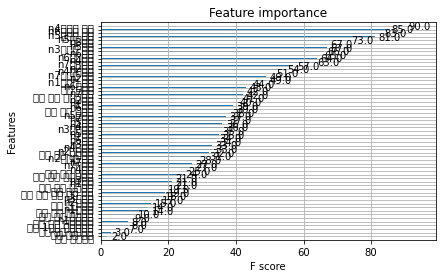

In [118]:
import xgboost 
xgboost.plot_importance(xg)

In [77]:
xg.feature_importances_

array([0.00782828, 0.01704311, 0.00614152, 0.01013341, 0.00819675,
       0.00662041, 0.00661161, 0.00969494, 0.01196286, 0.02507452,
       0.00995435, 0.00659836, 0.01075414, 0.01245238, 0.        ,
       0.00546079, 0.00855378, 0.00987959, 0.        , 0.00999375,
       0.0040113 , 0.00652482, 0.00324231, 0.00869008, 0.07152341,
       0.01318755, 0.00575781, 0.00699492, 0.0081266 , 0.01267359,
       0.16597342, 0.01036316, 0.01080932, 0.01025288, 0.00732283,
       0.00981302, 0.01679117, 0.00938845, 0.0073258 , 0.01035679,
       0.01132538, 0.0123571 , 0.02462463, 0.02110454, 0.010113  ,
       0.00599491, 0.00695864, 0.0130742 , 0.01729074, 0.01005985,
       0.00637706, 0.01053376, 0.01009119, 0.03763202, 0.05789762,
       0.00794952, 0.00853484, 0.00835681, 0.00835185, 0.11628948,
       0.01299911], dtype=float32)

In [119]:
pd.Series(xg.feature_importances_, x.columns).sort_values(ascending=False).head(60)

n2이슬점 온도          0.165973
n7해면기압            0.116289
n1이슬점 온도          0.071523
n6이슬점 온도          0.057898
n6해면기압            0.037632
서울 평균 이슬점온도       0.025075
n4이슬점 온도          0.024625
n5습도              0.021105
n5이슬점 온도          0.017291
서울 일강수량           0.017043
n3이슬점 온도          0.016791
n2습도              0.013188
n5해면기압            0.013074
n7이슬점 온도          0.012999
n2해면기압            0.012674
서울 평균 해면기압        0.012452
n4해면기압            0.012357
서울 최대 풍향          0.011963
n4강수량             0.011325
n3풍향              0.010809
서울 평균 현지기압        0.010754
n6풍속              0.010534
n3습도              0.010363
n4풍속              0.010357
n3풍속              0.010253
서울 최대 순간 풍속 풍향    0.010133
n5풍향              0.010113
n6강수량             0.010091
n6습도              0.010060
n1습도              0.009994
서울 평균 상대습도        0.009954
서울 합계 소형증발량       0.009880
n3해면기압            0.009813
서울 풍정합            0.009695
n4습도              0.009388
n1해면기압            0.008690
서울 합계 대형증발량       0.008554
n

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [121]:
scaler = StandardScaler()
scaler.fit(x_train)

mm = MinMaxScaler()
mm.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

x_train_mm = mm.transform(x_train)
x_test_mm = mm.transform(x_test)

In [122]:
# for m in model:
#     m.fit(x_train_mm, y_train)
#     pred = m.predict(x_test_mm)
#     preds = m.predict_proba(x_test_mm)[1]
#     print(classification_report(y_test, preds[:,1]))
#     print('='*100)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [82]:
from sklearn.metrics import roc_auc_score

In [97]:
df_m_p.columns

Index(['일시', '서울 1시간 최다강수량', '서울 일강수량', '서울 최대 순간풍속', '서울 최대 순간 풍속 풍향',
       '서울 최대 풍속', '서울 최대 풍속 풍향', '서울 평균 풍속', '서울 풍정합', '서울 최대 풍향',
       '서울 평균 이슬점온도', '서울 평균 상대습도', '서울 평균 증기압', '서울 평균 현지기압', '서울 평균 해면기압',
       '서울 일 최심적설', '서울 평균 전운량', '서울 합계 대형증발량', '서울 합계 소형증발량', '서울 안개 계속 시간',
       'target', 'target_t', 'n1습도', 'n1풍향', 'n1풍속', 'n1강수량', 'n1해면기압',
       'n1이슬점 온도', 'n2습도', 'n2풍향', 'n2풍속', 'n2강수량', 'n2해면기압', 'n2이슬점 온도',
       'n3습도', 'n3풍향', 'n3풍속', 'n3강수량', 'n3해면기압', 'n3이슬점 온도', 'n4습도', 'n4풍향',
       'n4풍속', 'n4강수량', 'n4해면기압', 'n4이슬점 온도', 'n5습도', 'n5풍향', 'n5풍속', 'n5강수량',
       'n5해면기압', 'n5이슬점 온도', 'n6습도', 'n6풍향', 'n6풍속', 'n6강수량', 'n6해면기압',
       'n6이슬점 온도', 'n7습도', 'n7풍향', 'n7풍속', 'n7강수량', 'n7해면기압', 'n7이슬점 온도'],
      dtype='object')

In [220]:
y_p = df_test.dropna()['target_t0'] # 
x_p = df_test.dropna().drop(['target_t0','일시'], axis=1)

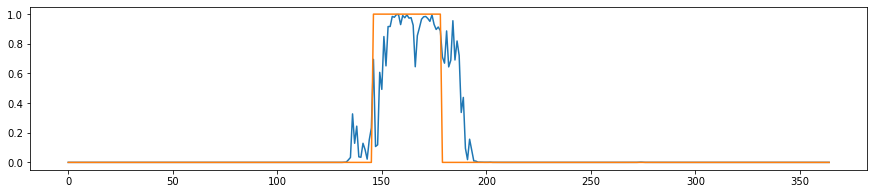

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(lbgm.predict_proba(x_p)[:,1])
plt.plot(y_p.reset_index(drop=True))
# plt.plot(lbgm.predict(x_p))

In [ ]:
# 저장용

In [31]:
from lightgbm import LGBMClassifier

y = df_m_window.dropna()['target_t0']
x = df_m_window.dropna().drop(['target_t0','일시'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)



In [32]:
lbgm = LGBMClassifier()

In [33]:
 lbgm.fit(x_train, y_train)

LGBMClassifier()

In [34]:
import pickle

In [22]:
# saved_model = pickle.dumps(lbgm)

In [35]:
with open('lbgm.pickle', 'wb') as f:
    pickle.dump(lbgm, f, pickle.HIGHEST_PROTOCOL)

In [36]:
with open('lbgm.pickle', 'rb') as f:
    lbgm_a = pickle.load(f)

In [25]:
# !pip install joblib

In [37]:
from sklearn.metrics import classification_report, roc_auc_score

In [38]:
pred = lbgm_a.predict(x_test)   
prob = lbgm_a.predict_proba(x_test)

In [39]:
print(classification_report(y_test, pred))
print('-'*50)
print('roc_auc : ',roc_auc_score(y_test, prob[:,1]))
print('='*100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1649
           1       0.89      0.87      0.88       151

    accuracy                           0.98      1800
   macro avg       0.94      0.93      0.93      1800
weighted avg       0.98      0.98      0.98      1800

--------------------------------------------------
roc_auc :  0.9937148341961213


In [50]:
df_test.to_csv('df_test_2019.csv')